# Final Project
## Modeling Propagation Delay of Inverters
## Juan Ramon Cai

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
from matplotlib import animation
from scipy import signal

In [3]:
def checkHalf(val, half):
    temphalf = (half * 1e3) 
    tempval = (val * 1e3)
    return temphalf - 3 <= tempval and tempval < temphalf + 3

def pwmGenerator(start, numInperiod, steps):
    if start not in [0,1]:
        print(f"Improper start value {start}")
        return
    output = []
    for s in range(steps):
        output.extend([start] * int(numInperiod / 2))
        output.extend([vdd - start] * int(numInperiod / 2))
    return output

In [4]:
# Initial Conditions
vdd = 2
halfVdd = vdd / 2
t = 0
R = 10 #Ohms
C = 1e-2 #Farads
tau = R * C
tLen = 8 * tau
dt = tLen / 1e2

# Ordinary Diff. Equations
def highLow(t, v0): return -v0 / (R * C)

def lowHigh(t, v0): return (vdd - v0) / (R * C)

# ODE selector 
def invDir(IN):
    if IN <= .5: return lowHigh
    else: return highLow

"""
    Runge Kutta method for ODE
"""
def inverterRK(t0, V0, t, h):
    n = (int) ((t - t0) / h)
    v = V0
    
    for i in range(1, n + 1):
        k1 = h * invDir(V0)(t0, v) 
        k2 = h * invDir(V0)(t0 + 0.5 * h, v + 0.5 * k1) 
        k3 = h * invDir(V0)(t0 + 0.5 * h, v + 0.5 * k2) 
        k4 = h * invDir(V0)(t0 + h, v + k3) 
        
        v = v + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)
        
        t0 = t0 + h
    return v

"""
    ODE Graph
"""
def inverterList(v0, tLim):
    
    global dt
    output = []
    t = 0
    while (t < tLim):
        output.append(inverterRK(0, v0, t, dt))
        t += dt
    return output


In [5]:
# TEST

# x = np.linspace(0, xlim, points) 
# y = []
# y.extend(inverterList(0, tLen))
# y.extend(inverterList(vdd, tLen))

# plt.plot(y)
# plt.show()

In [6]:
def inverter(samplePeriod, indexP, vInput, maxVal):
    """
        Logic Inverter 
    """
    global dt
    lenInput = len(vInput)
    numSamples = (int) (lenInput /  indexP)
    output = [vInput[0]]
    for num in range(numSamples):
        limit = samplePeriod
        v0In = (int) (num * indexP)
        output.extend(inverterList(output[-1], limit))
    output = output[1:]
    if len(output) != len(vInput):
        print(f"Number of input Voltage ({lenInput})is not the same as output Voltage ({len(output)})")
        return output
    return output

C:\Users\juanc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
C:\Users\juanc\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # This is added back by InteractiveShellApp.init_path()


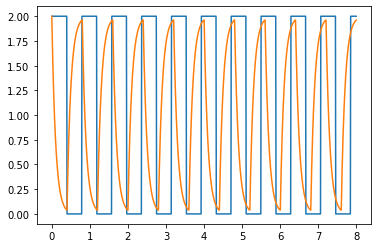

In [7]:
mult = 10
xlim = tLen * mult
B = 1
period = tLen * B 

x = np.linspace(0, xlim, 1e2 * mult) 
pwmy = pwmGenerator(0, 1e2, mult)
voltage = inverter(period / 2, 1e2 / 2, pwmy, xlim)

p = period * 10
xsin= np.linspace(0, xlim, 1e2 * mult) 
seno = np.sin(p * xsin) 
pwmsin = signal.square(seno) + 1
voltage = inverter(period / 2, 1e2 / 2, pwmsin, xlim)
plt.plot(xsin,pwmsin)
plt.plot(xsin, voltage)
plt.show()

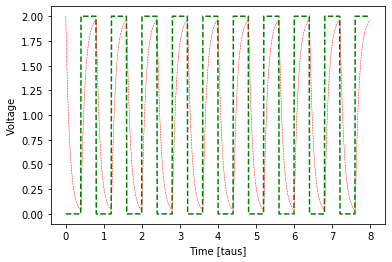

In [8]:
plt.plot(x,pwmy, 'g--')
plt.ylabel("Voltage")
plt.xlabel("Time [taus]")
plt.plot(x, voltage, 'r--', linewidth = .5)
plt.show()

In [9]:
print(r'$\psi$')

$\psi$


No handles with labels found to put in legend.
No handles with labels found to put in legend.


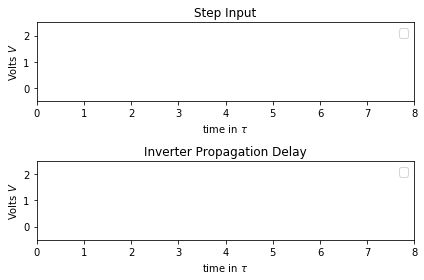

In [10]:
mult = 10
xlim = tLen * mult
B = 1
period = tLen * B 

######################   Create Animation   ############################

fig = plt.figure()
xlim = (0, xlim)
ylim = (-.5, vdd +.5)

# Graph 1
ax1 = fig.add_subplot(211,xlim=xlim, ylim=ylim)
pwm, = ax1.plot([], [], lw=2)
ax1.set_title("Step Input")
ax1.legend(prop=dict(size=12))
ax1.set_xlabel(r'time in $\tau$')
ax1.set_ylabel(r'Volts $V$')

# Graph 2
ax2 = fig.add_subplot(212, xlim=xlim, ylim=ylim)
sine, = ax2.plot([], [], lw=2)
ax2.set_title("Inverter Propagation Delay")
ax2.legend(prop=dict(size=12))
ax2.set_xlabel(r'time in $\tau$')
ax2.set_ylabel(r'Volts $V$')

fig.tight_layout()

In [11]:
def init():
    pwm.set_data([], [])
    sine.set_data([], [])
    return (pwm, sine)

def animate(i):
    mult = 10
    xlim = tLen * mult
    B = 1
    period = tLen * B 

    p = period * 10
    xsin= np.linspace(0, xlim, 1e2 * mult)  - dt * i
    sin = np.sin(p * xsin) 
    pwmsin = signal.square(sin) + 1
    invert = inverter(period / 2, 1e2 / 2, pwmsin, xlim)
    
    pwm.set_data(x, pwmsin)
    sine.set_data(x, invert)

    return (pwm, sine)


In [12]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=350, interval=100, blit=True)

In [13]:
anim.save('Inverter Propagation Delay (Wrong).mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

C:\Users\juanc\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  del sys.path[0]
